#  `geoplanar` & holc

In [1]:
import geoplanar
import geopandas as gpd

In [2]:
us = gpd.read_file('/Users/ecv/projects/geoplanar/geoplanar/datasets/holc/fullDownload.geojson')

<AxesSubplot:>

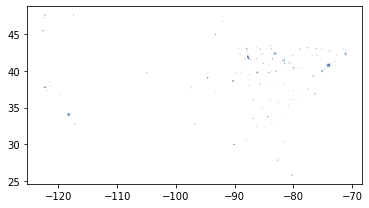

In [3]:
us.plot()

In [4]:
us.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
0,AL,Birmingham,Mountain Brook Estates and Country Club Garden...,A1,A,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.75678 33.49754, -86.75692 ..."
1,AL,Birmingham,"Redmont Park, Rockridge Park, Warwick Manor, a...",A2,A,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.75867 33.50933, -86.76093 ..."
2,AL,Birmingham,"Colonial Hills, Pine Crest (outside city limits)",A3,A,"{'5': 'Generally speaking, houses are not buil...","MULTIPOLYGON (((-86.75678 33.49754, -86.75196 ..."
3,AL,Birmingham,"Grove Park, Hollywood, Mayfair, and Edgewood s...",B1,B,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.80111 33.48071, -86.80099 ..."
4,AL,Birmingham,Best section of Woodlawn Highlands,B10,B,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.74923 33.53332, -86.74916 ..."


In [5]:
us.shape

(7502, 7)

In [6]:
us.tail()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
7497,WV,Wheeling,None,D4,D,"{'0': 'Wheeling, W.Va.', '5': 'This area inclu...","MULTIPOLYGON (((-80.71985 40.06376, -80.71788 ..."
7498,WV,Wheeling,None,D5,D,"{'0': 'Wheeling, W.Va.', '5': 'At south end of...","MULTIPOLYGON (((-80.72854 40.06729, -80.72837 ..."
7499,WV,Wheeling,None,D6,D,"{'0': 'Wheeling, W.Va.', '5': 'This is a very ...","MULTIPOLYGON (((-80.72216 40.06134, -80.72256 ..."
7500,WV,Wheeling,None,D7,D,"{'0': 'Wheeling, W.Va.', '5': 'This is an area...","MULTIPOLYGON (((-80.64740 40.04886, -80.64845 ..."
7501,WV,Wheeling,None,D8,D,"{'0': 'Wheeling, W.Va.', '5': 'Junior Avenue a...","MULTIPOLYGON (((-80.66614 40.04970, -80.66395 ..."


In [7]:
us.groupby(by='holc_grade').count() # grouping by holc grade

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,819,819,233,813,819,819
B,1950,1950,443,1935,1950,1950
C,2960,2960,544,2943,2960,2960
D,1771,1771,296,1750,1771,1771
E,2,2,0,2,2,2


In [8]:
ca = us[us.state=='CA'] # subsetting ca

In [9]:
ca.city.unique() # which ca cities are holc graded

array(['Fresno', 'Los Angeles', 'Oakland', 'Sacramento', 'San Diego',
       'San Francisco', 'San Jose', 'Stockton'], dtype=object)

In [10]:
sd = us[us.city=='San Diego'] # testing sd

In [11]:
sd.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
729,CA,San Diego,Matton Bond District,A1,A,{'1': 'Topography mostly level with some canyo...,"MULTIPOLYGON (((-117.26806 32.84007, -117.2689..."
730,CA,San Diego,East Balboa Park,A10,A,"{'1': 'Topography high and practically level, ...","MULTIPOLYGON (((-117.13217 32.74097, -117.1323..."
731,CA,San Diego,Kennsington Heights,A11,A,"{'1': 'This area known as Kensington Heights, ...","MULTIPOLYGON (((-117.10164 32.76750, -117.1049..."
732,CA,San Diego,Talmadge Park,A12,A,"{'1': 'Topography, gentle canyons and mesa lan...","MULTIPOLYGON (((-117.08837 32.76868, -117.0883..."
733,CA,San Diego,Mattoon District,A13,A,"{'1': 'This is similar to A-12, but not quite ...","MULTIPOLYGON (((-117.08875 32.76258, -117.0890..."


In [12]:
sd.shape

(76, 7)

<AxesSubplot:>

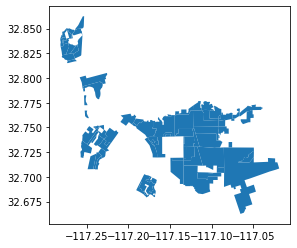

In [13]:
sd.plot()

In [14]:
sd.groupby(by='holc_grade').count() # grouping sd by holc grade

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,17,17,11,14,17,17
B,27,27,14,23,27,27
C,22,22,15,22,22,22
D,10,10,5,10,10,10


<AxesSubplot:>

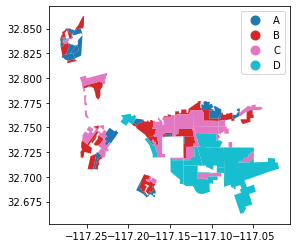

In [15]:
sd.plot(column='holc_grade', categorical=True, legend=True)

In [16]:
from shapely.geometry import box

clipper = gpd.GeoDataFrame(geometry =[box(-117.25, 32.2, -117.03, 32.9)])


## sd holc discrepancies

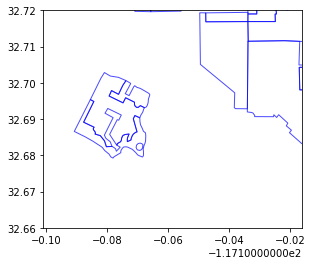

In [39]:
base = sd.plot(alpha=0.7, facecolor='none', edgecolor='blue')
_ = base.set_xlim(-117.201, -117.116)
_ = base.set_ylim(32.66, 32.72)


In [24]:
mi = geoplanar.missing_interiors(sd)
mi

[]

In [29]:
sd1 = geoplanar.add_interiors(sd)

In [36]:
geoplanar.missing_interiors(sd1)

[]

In [30]:
import libpysal

In [31]:
w = libpysal.weights.Queen.from_dataframe(sd)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


In [32]:
w.neighbors

{0: [25, 75, 30],
 1: [22, 23],
 2: [27, 43, 26, 3],
 3: [2, 27, 4, 28],
 4: [27, 3, 28],
 5: [50, 28],
 6: [25, 31],
 7: [8, 73, 74],
 8: [32, 7, 73, 74, 31],
 9: [36, 54, 55],
 10: [56, 69, 15],
 11: [16, 61],
 12: [18],
 13: [20],
 14: [75],
 15: [56, 10],
 16: [17, 57, 11, 61, 62],
 17: [16, 57, 58, 62],
 18: [12, 38],
 19: [57],
 20: [57, 13],
 21: [26, 43, 39],
 22: [1, 42, 23, 39],
 23: [1, 22, 24, 41, 42],
 24: [40, 41, 23],
 25: [0, 59, 6, 31],
 26: [2, 21, 39, 27, 43],
 27: [2, 3, 4, 26, 43, 28, 46],
 28: [3, 4, 5, 27, 43, 46],
 29: [44],
 30: [0, 37],
 31: [37, 6, 8, 25, 74, 59],
 32: [8],
 33: [53, 54],
 34: [54, 35, 53, 70],
 35: [34],
 36: [9, 54, 55],
 37: [59, 30, 31],
 38: [18],
 39: [26, 21, 22, 57, 42, 43, 44],
 40: [64, 24, 63, 41],
 41: [64, 23, 40, 24, 42, 63],
 42: [64, 66, 67, 39, 41, 44, 22, 23],
 43: [2, 39, 44, 46, 47, 21, 26, 27, 28],
 44: [66, 39, 42, 43, 29, 46, 47],
 45: [65, 68],
 46: [43, 27, 28, 44, 47],
 47: [43, 44, 46],
 48: [72, 52],
 49: [60],
 50

In [37]:
w = libpysal.weights.Queen.from_dataframe(sd1)

In [38]:
w.neighbors

{0: [25, 75, 30],
 1: [22, 23],
 2: [27, 43, 26, 3],
 3: [2, 27, 4, 28],
 4: [27, 3, 28],
 5: [50, 28],
 6: [25, 31],
 7: [8, 73, 74],
 8: [32, 7, 73, 74, 31],
 9: [36, 54, 55],
 10: [56, 69, 15],
 11: [16, 61],
 12: [18],
 13: [20],
 14: [75],
 15: [56, 10],
 16: [17, 57, 11, 61, 62],
 17: [16, 57, 58, 62],
 18: [12, 38],
 19: [57],
 20: [57, 13],
 21: [26, 43, 39],
 22: [1, 42, 23, 39],
 23: [1, 22, 24, 41, 42],
 24: [40, 41, 23],
 25: [0, 59, 6, 31],
 26: [2, 21, 39, 27, 43],
 27: [2, 3, 4, 26, 43, 28, 46],
 28: [3, 4, 5, 27, 43, 46],
 29: [44],
 30: [0, 37],
 31: [37, 6, 8, 25, 74, 59],
 32: [8],
 33: [53, 54],
 34: [54, 35, 53, 70],
 35: [34],
 36: [9, 54, 55],
 37: [59, 30, 31],
 38: [18],
 39: [26, 21, 22, 57, 42, 43, 44],
 40: [64, 24, 63, 41],
 41: [64, 23, 40, 24, 42, 63],
 42: [64, 66, 67, 39, 41, 44, 22, 23],
 43: [2, 39, 44, 46, 47, 21, 26, 27, 28],
 44: [66, 39, 42, 43, 29, 46, 47],
 45: [65, 68],
 46: [43, 27, 28, 44, 47],
 47: [43, 44, 46],
 48: [72, 52],
 49: [60],
 50